The objective of this colab is :
- Demonstrate training data and model componenets of linear regression model
-Demonstrate how simple it is to implement ML components and algorithms

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Quick Recap
1. Training data contains features and label that is real number
2. Model or inderence : **y= Xw**

# C1: Training Data

In [ ]:
# Create a dataset of 100 examples with a single feature and a label
# For this construction, we use the following three parameters:
w1=3
w0=4
n=100

X=10* np.random.rand(n,)

#Obtain y=4+3*x+noise. Noise is randomly sampled
y=w0+w1*X+np.random.randn(n,)

In [ ]:
X

array([1.29309007e+00, 9.18133349e+00, 8.12688457e+00, 1.82120402e+00,
       3.43015441e+00, 8.25154748e+00, 3.96903380e-01, 5.75900845e+00,
       6.13050238e+00, 7.05723056e+00, 1.95661633e+00, 9.03974649e+00,
       6.03545179e+00, 3.39445975e+00, 1.40019580e+00, 9.52649059e+00,
       9.64466247e-01, 7.32328143e+00, 3.19304663e+00, 3.56569268e+00,
       6.16883455e+00, 3.20586986e+00, 8.94120278e+00, 1.80577420e+00,
       7.74977616e+00, 6.42109976e+00, 3.15740248e+00, 4.65295570e+00,
       5.85248361e+00, 3.10399375e+00, 2.00958078e-01, 9.51820223e-01,
       1.85274767e+00, 1.30089111e+00, 8.93109195e+00, 3.23026448e+00,
       8.71038735e+00, 7.81084080e+00, 9.18654803e+00, 9.94009790e+00,
       9.67498331e+00, 3.70546269e+00, 4.20309978e+00, 7.48622198e+00,
       8.43547561e+00, 2.46123754e+00, 2.33297659e+00, 2.37067720e-01,
       2.88979559e+00, 2.96475521e+00, 7.42818260e+00, 5.37822099e-01,
       5.70420594e+00, 4.61980697e+00, 8.14927177e+00, 6.60289110e-01,
      

Checking the shape of the tarining data for sanity check

In [ ]:
print("Shape of the training data feature matrix:", X.shape)
print("Shape of the label vector:", y.shape)

Shape of the training data feature matrix: (100,)
Shape of the label vector: (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20, random_state=42
)

In [ ]:
print("Shape of the training feature matrix:", X_train.shape)
print("shape of training label vector:", y_train.shape)

print("shape of test feature matrix:", X_test.shape)
print("Shape of test label vector: ", y_test.shape)

Shape of the training feature matrix: (80,)
shape of training label vector: (80,)
shape of test feature matrix: (20,)
Shape of test label vector:  (20,)


Let's quickly check the first few examples and labels

In [ ]:
X_train[:5]

array([0.66028911, 3.03075522, 3.15740248, 4.20309978, 2.12658022])

In [ ]:
y_train[:5]

array([ 4.44032817, 13.80097159, 14.9223937 , 16.99292103, 11.88442633])

Let's visualize thr training set

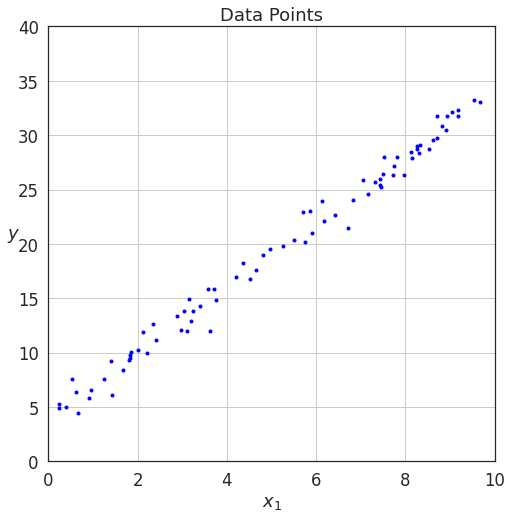

In [ ]:
sns.set_style("white")
f=plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,10,0,40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is: $y=w_0+w_1x_1$.
As discussed in the lectures, we add a special dummy feature $x_0$ and set it to 1. We create a helper function for that.

In [ ]:
def add_dummy_feature(x):
  '''Adds a dummy feature to the dataset
  Args:
  x:Training dataset

  Returns 
    Training dataset with an addtion of dummy featue
  '''

  # np.ones(x.shape[0]) create a vector of 1's having the same number
  # rows as number of samples in dataset
  return np.column_stack((np.ones(x.shape[0]),x))

Let's write a test case to test this function:
For that let's take two examples and three features. The forst example is a feature vector:
$$x_{3x1}^{(1)} = \begin{bmatrix}
   3 \\
   2 \\
   5
\end{bmatrix}$$
And the second example is:
$$x_{3x1}^{(2)} = \begin{bmatrix}
   9 \\
   4 \\
   7
\end{bmatrix}$$

And recall that a feature matrix X has shape(n,m) corresponding to features of all examples before adding the dummy feature $x_0$.
$$X_{nxm}  = \begin{bmatrix}
   -(x^{(1)})^T- \\
   -(x^{(2)})^T-  \\
   : \\
   : \\
   -(x^{(n)})^T- 
\end{bmatrix}$$

In our current example this becomes:
$$X_{2x3}  = \begin{bmatrix}
   -(x^{(1)})^T- \\
   -(x^{(2)})^T-  
\end{bmatrix}$$

The corresponding feature matrix X appears as follows:
$$X_{2x3} =  \begin{bmatrix}
   3 & 2 & 5 \\
   9 & 4 & 7  \\
\end{bmatrix}$$

Here the feature vector are transposed and represented as rows:
- the first row correspinds to the first example
-Second row corresponds to the second example
Once we add the dummy feature, the resulting matrix becomes:
$$X_{2x3} =  \begin{bmatrix}
   1& 3 & 2 & 5 \\
   1& 9 & 4 & 7  \\
\end{bmatrix}$$


In [ ]:
import unittest

class TestAddDummyFeature(unittest.TestCase):
  
  def test_add_dummy_feature(self):
    '''Test case function for add_dummy_feature'''
    train_matrix = np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

    #test the shape
    self.assertEqual(train_matrix_with_dummy_feature.shape,(2,4))

    # test the contents
    np.testing.assert_array_equal(
        train_matrix_with_dummy_feature,
        np.array([[1,3,2,5],[1,9,4,7]])
    )
unittest.main(argv=[''],defaultTest='TestAddDummyFeature',verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [ ]:
add_dummy_feature(np.array([[3,2],[5,4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

Let's preprocess the training set to add the dummy feature

In [ ]:
print("Before adding the dummy feature:\n", X_train[:5])
print("\n")
X_train_with_dummy = add_dummy_feature(X_train)
print("After adding the dummy feature:\n", X_train_with_dummy[:5])

Before adding the dummy feature:
 [0.66028911 3.03075522 3.15740248 4.20309978 2.12658022]


After adding the dummy feature:
 [[1.         0.66028911]
 [1.         3.03075522]
 [1.         3.15740248]
 [1.         4.20309978]
 [1.         2.12658022]]


# C2: Model

The objective of this colab is to implement model and inference component from linear regression model

## Implementation

The general vectorized form is as follows:
$$y_{nx1} = X_{nx(m+1)}w_{(m+1)x1}$$

where
- n is the number of examples
- m is the number of features

In [ ]:
def predict(X,w):
	assert X.shape[-1]==w.shape[0], "X and w don't have compatibel dimensions"

	y=X @ w
	return y

Testing this function with the following feature matrix:
$$X_{2x4} =  \begin{bmatrix}
   1& 3 & 2 & 5 \\
   1& 9 & 4 & 7  \\
\end{bmatrix}$$

and weight vector **w** 
$$w_{4x1} = \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix}$$
Let's perform matrix vector multiplication between the feature X and weight vector w to obtain labels for all examples:
$$y=Xw$$
$$ =  \begin{bmatrix}
   1& 3 & 2 & 5 \\
   1& 9 & 4 & 7  \\
\end{bmatrix} x \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix}$$
$$=\begin{bmatrix}
11\\
21\\
\end{bmatrix}$$

In [ ]:
import unittest
class TestPredict(unittest.TestCase):

  def test_predict(self):
    #setup
    train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    #call
    predicted_label_vector = predict(train_matrix,weight_vector)

    #asserts the shape
    self.assertEqual(predicted_label_vector.shape,(2,))

    #asserts the contents
    np.testing.assert_array_equal(
        expected_label_vector,predicted_label_vector
    )
unittest.main(argv=[''],defaultTest='TestPredict',verbosity=2, exit=False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## Demonstration on synthetic dataset

In [ ]:
#@title Dataset: $n=100, m=1, [w_0,w_1]=[4,3]$ { display-mode: "form" }
def generate_data(n):
  w1=3
  w0=4
  X=10* np.random.rand(n,)
  y=w0+w1*X
  return X,y
X,y=generate_data(100)



In [ ]:
#@title Preprocessing: Dummy feature and train-test split { display-mode: "form" }
from sklearn.model_selection import train_test_split
def preprocess(X,y):
  X = add_dummy_feature(X)
  X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20, random_state=42
    )
  
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess(X,y)


Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for the given dataset:

In [ ]:
w= np.random.rand(2,)
w

array([0.28132141, 0.90670164])

In [ ]:
y_hat = predict(X_train,w)

Let's compare the prediction with the actual value:

In [ ]:
y_hat[:10]

array([1.32204798, 4.93577381, 8.853238  , 1.54242686, 3.95520397,
       3.2329301 , 1.43152136, 1.74781699, 6.85680232, 8.45456556])

In [ ]:
y_train[:10]

array([ 7.44344776, 19.40016759, 32.36186529,  8.17261443, 16.15576016,
       13.76597559,  7.80566188,  8.85218791, 25.75626675, 31.04277941])

Since we used a random weight vector w here, most of the predicted labels do not match the actual labels

## Comparison of vectorized and non-vectorized version of model inference

In [ ]:
def non_vectorized_predict(X,w):
  '''Prediction of output label for a given input.

  Args:
  X: Feature matrix of shape(n,m+1).
  w: weight vector of shape(m+1,n)

  REturns:
  y: Predicted label vector of shape(n,).
  '''
  y=[]
  for i in range(0,X.shape[0]):
    y_hat_i = 0
    for j in range(0,X.shape[1]):
      y_hat_i +=X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)

Let's compare run time of vectorized and non-vectorized versions on dataset with 100 examples

In [ ]:
import time

start_time = time.time()
y_hat_vectorized = predict(X_train,w)
end_time = time.time()
print('total time incurred in vectorized inference is : %0.6f s'%(end_time-start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train,w)
end_time = time.time()
print('total time incurred in non_vectorized inference is : %0.6f s'%(end_time-start_time))
np.testing.assert_array_equal(y_hat_vectorized,y_hat_non_vectorized)


total time incurred in vectorized inference is : 0.000130 s
total time incurred in non_vectorized inference is : 0.000376 s


In [ ]:
X,y = generate_data(1000000)
X_train, X_test, y_train, y_test = preprocess(X,y)

start_time = time.time()
y_hat_vectorized = predict(X_train,w)
end_time = time.time()
print('total time incurred in vectorized inference is : %0.6f s'%(end_time-start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train,w)
end_time = time.time()
print('total time incurred in non_vectorized inference is : %0.6f s'%(end_time-start_time))
np.testing.assert_array_equal(y_hat_vectorized,y_hat_non_vectorized)

total time incurred in vectorized inference is : 0.002263 s
total time incurred in non_vectorized inference is : 1.367848 s


# C3. Loss function implementation

The objective of this colab is to implement loss function of linear regression model from scratch

## Quick Recap
1. Training data contains featires and label that is real number
2. Model or inference y=Xw
3. Loss function: $ J(w)= \dfrac{1}{2}(Xw-y)^T(Xw-y)$

In [ ]:
def loss(X,y,w):
  e=predict(X,w)-y
  return (1/2)* (np.transpose(e) @ e)

In [ ]:
w= np.random.rand(2,)

In [ ]:
X,y =generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

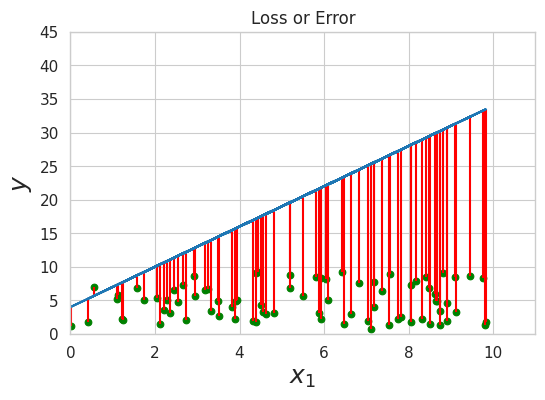

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4),dpi=100)
sns.set_context('paper',font_scale=1.25,rc={"lines.linewidth":1.5})
predicted_label=y_hat
x_l=X_train[:,-1]
plt.scatter(x_l,predicted_label,c='g')
plt.plot(x_l,y_train,)
plt.title('Loss or Error')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
plt.axis([0,11,0,45])
plt.vlines(X_train[:,-1],predicted_label,y_train,colors='r',linestyles='solid')

plt.show()

In [ ]:
X=np.array([[1,2,2,1],[1,1,3,2]])
y=np.array([3,5])
w=2*np.array([1,2,3,4])
a=loss(X,y,w)
a

977.0

# C4: Optimization

The objective of this colab is to implement optimization componenet of linear regression model.
It is implemented with one of the following two methods:
- Normal equation method, that sets the partial derivatice of the loss function w.r.t. weight vector to 0 and solves the resulting equation to obtain the weight vector.
- Gradient descent method that iteratively adjusts the weight vector based on the learning rate and the gradient of the loss function at the current weight vector.

In [ ]:
X,y =generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

## Normal Equation
The weight vector is estimated by matrix multiplication of pseudo inverse of feature matrix and the label vector.
The vectorized implementation is fairly straightforward.
- We make use of `np.linalg.pinv` for calculating pseudoinverse of the deature matrix

In [ ]:
def normal_equation(X,y):
  return np.linalg.pinv(X)@y

## Gradient Descent(GD)
GD is implemented as follows:
- Randomly initialize w to 0
-Iterate until convergence:
  - Calculate partial derivative of loss w.r.t weight vector
  - Calculate new values of weights.
  - Update weights to new values simultaneously
We use number of epochs as a convergence criteria in this implementation.


### Partial Derivative of Loss function
Let's first implement a function to calculate the partial derivative of loss function, which is obtained with the following equation:
$$\dfrac{\partial}{\partial w}J(w) = X^T(Xw-y)$$
the multiplication of transpose of feature matrix with difference of predicted and actual labels vectors.

In [ ]:
def calculate_gradient(X,y,w):
  return np.transpose(X)@(predict(X,w)-y)

### Weight Updates


In [ ]:
def update_weights(w,grad,lr):
  # "w_new:=w_old-lr*grad"
  return (w-lr*grad)

In [ ]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int):
  '''Estimate parameters of linear regression model through gradient descent

  Arguments:
  Returns:
  Weight vector:Final weight vector
  Error vector across different iterations
  Weight vectos across different iterations
  '''
  w_all = [] #all parameters across iterations
  err_all = [] #all errors across iterations.

  #Parameter vector initialized to [0,0]
  w=np.zeros((X.shape[1]))

  #Gradient decent loop
  print()
  for i in np.arange(0,num_epochs):
    w_all.append(w)

    #Calculate error due to the current weight vector: Note that here we use 
    #loss function to calculate the loss.
    err_all.append(loss(X,y,w))

    #Gradient claculation
    dJdW = calculate_gradient(X,y,w)

    #Print stats every 100 iterations
    if (i%100)==0:
      print('Iteration#: %d, loss:%4.2f'%(i,err_all[-1]))
    
    w=update_weights(w,dJdW,lr)
  return w, err_all, w_all

In [ ]:
class TestGradientDescent(unittest.TestCase):
  def test_gradient_decent(self):

    #setup
    feature_matrix = X_train
    label_vector = y_train
    expected_weights = np.array([4.,3.])

    #call
    w,err_all,w_all = gradient_descent(feature_matrix, label_vector, lr=.0001, num_epochs=2000)

    #asserts
    #test the shape
    self.assertEqual(w.shape,(2,))

    #test the contents
    np.testing.assert_array_almost_equal(expected_weights,w,decimal=0)
unittest.main(argv=[''],defaultTest='TestGradientDescent',verbosity=2, exit=False)

test_gradient_decent (__main__.TestGradientDescent) ... 


Iteration#: 0, loss:18345.82
Iteration#: 100, loss:73.89
Iteration#: 200, loss:52.80
Iteration#: 300, loss:37.73
Iteration#: 400, loss:26.96
Iteration#: 500, loss:19.26
Iteration#: 600, loss:13.76
Iteration#: 700, loss:9.83
Iteration#: 800, loss:7.03
Iteration#: 900, loss:5.02
Iteration#: 1000, loss:3.59
Iteration#: 1100, loss:2.56
Iteration#: 1200, loss:1.83
Iteration#: 1300, loss:1.31
Iteration#: 1400, loss:0.94
Iteration#: 1500, loss:0.67
Iteration#: 1600, loss:0.48
Iteration#: 1700, loss:0.34
Iteration#: 1800, loss:0.24
Iteration#: 1900, loss:0.17


ok

----------------------------------------------------------------------
Ran 1 test in 0.044s

OK


In [ ]:
w,err_all,w_all = gradient_descent(X_train,y_train,lr=0.00001,num_epochs=200)


Iteration#: 0, loss:18345.82
Iteration#: 100, loss:153.19


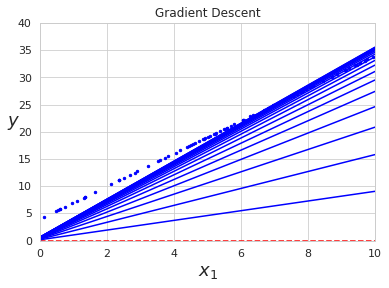

In [ ]:
#Plot model trajectory
X_b = np.c_[np.ones((X.shape[0],1)),X] # add x0=1 to each instance
X_new = np.array([[0],[10]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add x0=1 to each instance

for j in range(0,len(w_all)):
  if j%10 !=0: continue
  y_hat= predict(X_new_b,w_all[j])
  style = "b-" if j>0 else "r--"
  plt.plot(X_new_b[:,-1], y_hat,style)

plt.plot(X_train[:,1],y_train,"b.")
plt.title("Gradient Descent")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,10,0,40])

plt.show()

In [ ]:
#@title Plotting Learning Curve
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('Iterations #')
  plt.ylabel('Loss: $J(\mathbf{w})$')


Iteration#: 0, loss:18345.82
Iteration#: 100, loss:73.89
Iteration#: 200, loss:52.80
Iteration#: 300, loss:37.73
Iteration#: 400, loss:26.96
Iteration#: 500, loss:19.26
Iteration#: 600, loss:13.76
Iteration#: 700, loss:9.83
Iteration#: 800, loss:7.03
Iteration#: 900, loss:5.02
Iteration#: 1000, loss:3.59
Iteration#: 1100, loss:2.56
Iteration#: 1200, loss:1.83
Iteration#: 1300, loss:1.31
Iteration#: 1400, loss:0.94
Iteration#: 1500, loss:0.67
Iteration#: 1600, loss:0.48
Iteration#: 1700, loss:0.34
Iteration#: 1800, loss:0.24
Iteration#: 1900, loss:0.17


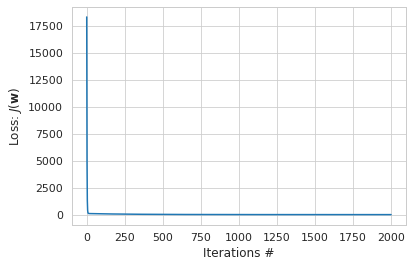

In [ ]:
w,err_all,w_all = gradient_descent(X_train,y_train,lr=0.0001,num_epochs=2000)
plot_learning_curves(err_all)

### Learning Rate and convergence
Let's vary the learning rate and observe the change in the convergence characteristics of GD.
We will use:
  - $\alpha = [1e-6, 1e-4,1e-1]$ to run GD for 2000 epochs each
  - Compare the convergence characteristics.


Iteration#: 0, loss:18345.82
Iteration#: 100, loss:10356.25
Iteration#: 200, loss:5865.54
Iteration#: 300, loss:3341.38
Iteration#: 400, loss:1922.52
Iteration#: 500, loss:1124.90
Iteration#: 600, loss:676.45
Iteration#: 700, loss:424.25
Iteration#: 800, loss:282.35
Iteration#: 900, loss:202.45
Iteration#: 1000, loss:157.39
Iteration#: 1100, loss:131.92
Iteration#: 1200, loss:117.46
Iteration#: 1300, loss:109.19
Iteration#: 1400, loss:104.39
Iteration#: 1500, loss:101.55
Iteration#: 1600, loss:99.81
Iteration#: 1700, loss:98.69
Iteration#: 1800, loss:97.92
Iteration#: 1900, loss:97.34


Text(0.5, 1.0, 'lr=1e-6')

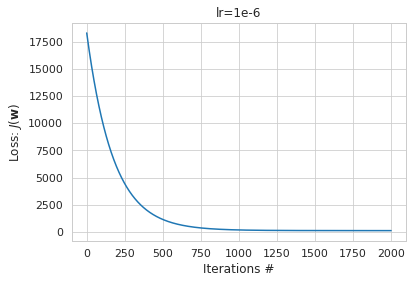

In [ ]:
w,err_all,w_all = gradient_descent(X_train,y_train,lr=1e-6,num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-6')


Iteration#: 0, loss:18345.82
Iteration#: 100, loss:73.89
Iteration#: 200, loss:52.80
Iteration#: 300, loss:37.73
Iteration#: 400, loss:26.96
Iteration#: 500, loss:19.26
Iteration#: 600, loss:13.76
Iteration#: 700, loss:9.83
Iteration#: 800, loss:7.03
Iteration#: 900, loss:5.02
Iteration#: 1000, loss:3.59
Iteration#: 1100, loss:2.56
Iteration#: 1200, loss:1.83
Iteration#: 1300, loss:1.31
Iteration#: 1400, loss:0.94
Iteration#: 1500, loss:0.67
Iteration#: 1600, loss:0.48
Iteration#: 1700, loss:0.34
Iteration#: 1800, loss:0.24
Iteration#: 1900, loss:0.17


Text(0.5, 1.0, 'lr=1e-4')

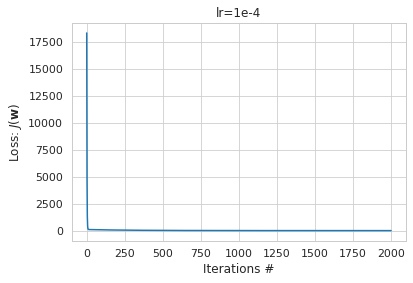

In [ ]:
w,err_all,w_all = gradient_descent(X_train,y_train,lr=1e-4,num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-4')


Iteration#: 0, loss:18345.82
Iteration#: 100, loss: inf
Iteration#: 200, loss: nan
Iteration#: 300, loss: nan
Iteration#: 400, loss: nan
Iteration#: 500, loss: nan
Iteration#: 600, loss: nan
Iteration#: 700, loss: nan
Iteration#: 800, loss: nan
Iteration#: 900, loss: nan
Iteration#: 1000, loss: nan
Iteration#: 1100, loss: nan
Iteration#: 1200, loss: nan
Iteration#: 1300, loss: nan
Iteration#: 1400, loss: nan
Iteration#: 1500, loss: nan
Iteration#: 1600, loss: nan
Iteration#: 1700, loss: nan
Iteration#: 1800, loss: nan
Iteration#: 1900, loss: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


Text(0.5, 1.0, 'lr=1e-1')

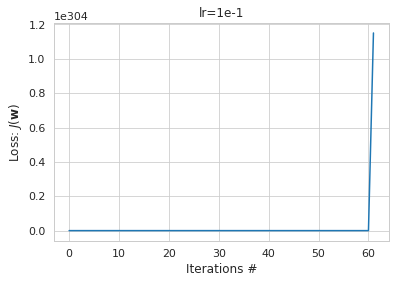

In [ ]:
w,err_all,w_all = gradient_descent(X_train,y_train,lr=1e-1,num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-1')

# C4: Optimization- Variations of GD(Minibatch and Stochastic)

## Mini-batch gradient descent(MBGD)

In [ ]:
t0,t1 = 200,100000
def learning_schedule(t):
  return t0/(t+t1)

In [ ]:
def mini_batch_gradient_descent(X,y,num_iters:int,minibatch_size:int):
  w_all,err_all = [],[]
  w= np.zeros((X.shape[1]))
  t=0

  for epochs in range(num_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    # print(shuffled_indices)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # print('X_shuffled:')
    # print(X_shuffled)
    # print('y_shuffled:')
    # print(y_shuffled)
    for i in range(0,X.shape[0], minibatch_size):
      t+=1
      xi =X_shuffled[i:i+minibatch_size]
      yi =y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi,yi,w))

      gradients = 2/minibatch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t)

      w=update_weights(w,gradients,lr)
      w_all.append(w)
  return w,err_all,w_all

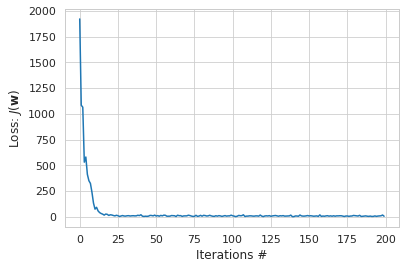

In [ ]:
w, err_all, w_all = mini_batch_gradient_descent(X_train,y_train,20,8)
plot_learning_curves(err_all)

In [ ]:
def sgd(X,y,num_epochs:int):
  w_all,err_all = [],[]
  w= np.zeros((X.shape[1]))
  

  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi =X[random_index:random_index+1]
      yi =y[random_index:random_index+1]
      err_all.append(loss(xi,yi,w))

      gradients = 2 * calculate_gradient(xi,yi,w)
      lr = learning_schedule(epoch*X.shape[0]+i)

      w=update_weights(w,gradients,lr)
      w_all.append(w)
  return w,err_all,w_all

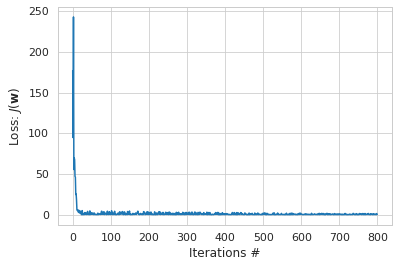

In [ ]:
w,err_all,w_all = sgd(X_train,y_train,10)
plot_learning_curves(err_all)

# Linear Regression: combining all components

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
class LinReg(object):
  '''
  Linear Regression model
  -----------------------
  y=X@w
  X:A feature matrix
  w: weight vector
  y:label vector
  '''
  def __init__(self):
    self.t0= 200
    self.t1 = 100000
  
  def predict(self,X:np.ndarray) -> np.ndarray:
    '''
    Prediction of output label for a given input.

    Args:
    X: Feature matrix for given inputs
    Returns:
    y: Output label vector as predicted by the given model.
    '''
    y=X@self.w
    return y

  def loss(self,X:np.ndarray,y:np.ndarray) -> float:
    '''
    Calculates loss for a model based on known labels

    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Return:
    Loss
    '''
    e = y-self.predict(X)
    return (1/2)*(np.transpose(e)@e)

  def rmse(self, X,y):
    '''Calculates root mean squared error of prediction w.r.t actual label.'''
    return np.sqrt((2/X.shape[0])* self.loss(X,y))
  
  def fit(self,X:np.ndarray,y:np.ndarray) -> np.ndarray:
    '''Estimates parameters of the linear regression model with normal equation
    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    Weight vector
    '''
    self.w = np.linalg.pinv(X)@y
    return self.w

  def calculate_gradient(self,X,y):
    '''
    Calculate gradient of loss function w.r.t weight vector on training set.

    Arguments:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(self.predict(X)-y)

  def update_weights(self,grad,lr):
    return self.w-lr*grad

  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X,y,num_epochs,lr):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(dJdW,lr)
    return self.w

  def mbgd(self,X,y,num_epochs,batch_size):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    mini_batch_id=0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id+=1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        #important step--------------------------
        dJdW = 2/batch_size * self.calculate_gradient(xi,yi)
        #------------------------------------------------
        self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self,X,y,num_epochs:int):
    self.w_all,self.err_all = [],[]
    self.w= np.zeros((X.shape[1]))
    

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi =X[random_index:random_index+1]
        yi =y[random_index:random_index+1]
        self.err_all.append(self.loss(xi,yi))
        #important step--------------------------
        gradients = 2 * self.calculate_gradient(xi,yi)
        
        lr = self.learning_schedule(epoch*X.shape[0]+i)
        #------------------------------------------------
        self.w=self.update_weights(gradients,lr)
        self.w_all.append(self.w)
    return self.w

In [ ]:
#@title Generating without noise Dataset: $n=100, m=1, [w_0,w_1]=[4,3]$ { display-mode: "form" }
def generate_data(n):
  w1=3
  w0=4
  X=10* np.random.rand(n,)
  y=w0+w1*X
  return X,y


In [ ]:
#@title Generating with Noise Dataset: $n=100, m=1, [w_0,w_1]=[4,3]$ { display-mode: "form" }
def generate_data(n):
  w1=3
  w0=4
  X=10* np.random.rand(n,)
  y=w0+w1*X+np.random.randn(n,)
  return X,y


In [ ]:
#@title Preprocessing: Dummy feature and train-test split { display-mode: "form" }
from sklearn.model_selection import train_test_split
def preprocess(X,y):
  X = add_dummy_feature(X)
  X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20, random_state=42
    )
  
  return X_train, X_test, y_train, y_test

In [ ]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test =  preprocess(X,y)

### Comparing weight vectors obtained by normal equation, GD, MBGD and SGD

In [ ]:
#normal equation
lin_reg = LinReg()
lin_reg.fit(X_train,y_train)
print("Weight vector of normal equation: ",lin_reg.w)

#gradient decent
lin_reg.gd(X_train,y_train,1000,lr=1e-4)
print("Weight vector of gradient descent: ",lin_reg.w)

#mbgd
lin_reg.mbgd(X_train,y_train,1000,16)
print("Weight vector of mini-batch gradient descent: ",lin_reg.w)

#sgd
lin_reg.sgd(X_train,y_train,1000)
print("Weight vector of stochastic gradient descent: ",lin_reg.w)

Weight vector of normal equation:  [4.05587883 2.99727543]
Weight vector of gradient descent:  [3.46435677 3.08627751]
Weight vector of mini-batch gradient descent:  [4.01096795 3.00353829]
Weight vector of stochastic gradient descent:  [4.06953388 2.99378994]


## Linear Regression on multiple Features and single label

In [ ]:
#@title Plotting Learning Curve
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('Iterations #')
  plt.ylabel('Loss: $J(\mathbf{w})$')

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=200,n_features=10, n_informative=10, 
                           n_targets=1, shuffle=True,coef=True,
                            noise=0.5, random_state=0)

In [ ]:
print('Shape of the feature matrix: ',X.shape)
print('Shape of the label vector: ',y.shape)
print('shape of the coeff vector: ',coef.shape)
print('Weight vector used for data generation:',coef)

Shape of the feature matrix:  (200, 10)
Shape of the label vector:  (200,)
shape of the coeff vector:  (10,)
Weight vector used for data generation: [40.05104636 10.32532207 51.90989393  6.18447832 41.09157343 28.46940664
 88.97621358  9.68032193 15.48694157 44.96944303]


In [ ]:
X_train, X_test, y_train, y_test =  preprocess(X,y)

In [ ]:
lin_reg.fit(X_train,y_train)
print("Weight vector of normal equation: ",lin_reg.w)







Weight vector of normal equation:  [4.30868690e-03 4.00335228e+01 1.03086790e+01 5.19091277e+01
 6.29286567e+00 4.11625781e+01 2.84422862e+01 8.89543306e+01
 9.75752481e+00 1.54723974e+01 4.49980952e+01]
Weight vector of gradient descent:  [4.23513204e-03 4.00335497e+01 1.03081869e+01 5.19092201e+01
 6.29241093e+00 4.11619488e+01 2.84422549e+01 8.89543222e+01
 9.75811687e+00 1.54722408e+01 4.49977615e+01]
Weight vector of mini-batch gradient descent:  [4.29595364e-03 4.00335869e+01 1.03086610e+01 5.19091056e+01
 6.29288373e+00 4.11625369e+01 2.84423868e+01 8.89543169e+01
 9.75752631e+00 1.54723696e+01 4.49980658e+01]
Weight vector of stochastic gradient descent:  [1.93260290e-02 4.00209390e+01 1.03036680e+01 5.19091241e+01
 6.30827909e+00 4.11713960e+01 2.84332880e+01 8.89522709e+01
 9.75029657e+00 1.54700847e+01 4.50191060e+01]


In [ ]:
np.testing.assert_array_almost_equal(coef,lin_reg.w[1:],decimal=0)

Weight vector of gradient descent:  [4.23513204e-03 4.00335497e+01 1.03081869e+01 5.19092201e+01
 6.29241093e+00 4.11619488e+01 2.84422549e+01 8.89543222e+01
 9.75811687e+00 1.54722408e+01 4.49977615e+01]


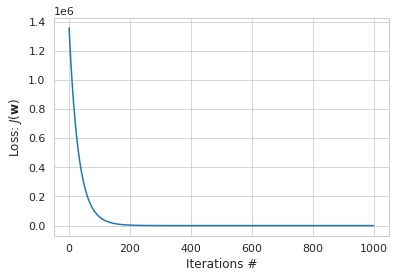

In [ ]:
#gradient decent
lin_reg.gd(X_train,y_train,1000,lr=1e-4)
print("Weight vector of gradient descent: ",lin_reg.w)


Weight vector of mini-batch gradient descent:  [4.26850435e-03 4.00334562e+01 1.03087207e+01 5.19091854e+01
 6.29294095e+00 4.11625382e+01 2.84422869e+01 8.89543089e+01
 9.75751798e+00 1.54724060e+01 4.49981703e+01]


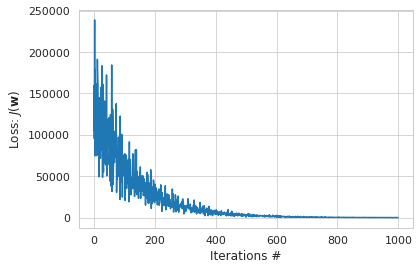

In [ ]:
#mbgd
lin_reg.mbgd(X_train,y_train,1000,16)
print("Weight vector of mini-batch gradient descent: ",lin_reg.w)
plot_learning_curves(lin_reg.err_all[:1000])

Weight vector of stochastic gradient descent:  [-1.52576327e-02  4.00436984e+01  1.03054363e+01  5.19032460e+01
  6.27669875e+00  4.11670967e+01  2.84337233e+01  8.89613406e+01
  9.77003769e+00  1.54877231e+01  4.49964081e+01]


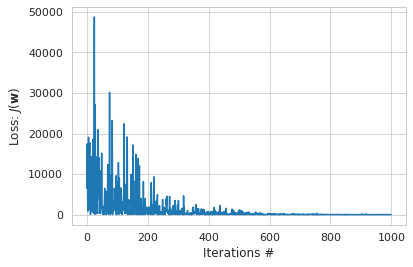

In [ ]:
#sgd
lin_reg.sgd(X_train,y_train,1000)
print("Weight vector of stochastic gradient descent: ",lin_reg.w)
plot_learning_curves(lin_reg.err_all[:1000])